# 9/4/2023 ***PyTorch Workflow***

In [2]:
print('Hello Pytorch!')

Hello Pytorch!


### We'll use a linear regression formula to make a straight line with known parameters:  
$ y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n $



In [17]:
# Create a known parameters:
weight = 0.7
bias = 0.3

# Create:

start = 0
end = 1
step = 0.02

import torch
import pandas as pd

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]
len(X), len(y)

(50, 50)

## Splitting data *(training and test sets)*

In [23]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
len(X_train), len(y_train)

X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Buiding a $f(x)$ to visualize our data

In [35]:
import matplotlib.pyplot as plt

def plot_predictions(train_data = X_train, 
                    train_labels = y_train,
                    test_data = X_test, 
                    test_labels = y_test,
                    predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(8, 5))
    
    #plot training data in colour blue / test in green
    plt.scatter(train_data, train_labels, c="b", s=4, label= "Training dataset")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    #are there predictions?
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 11})
    

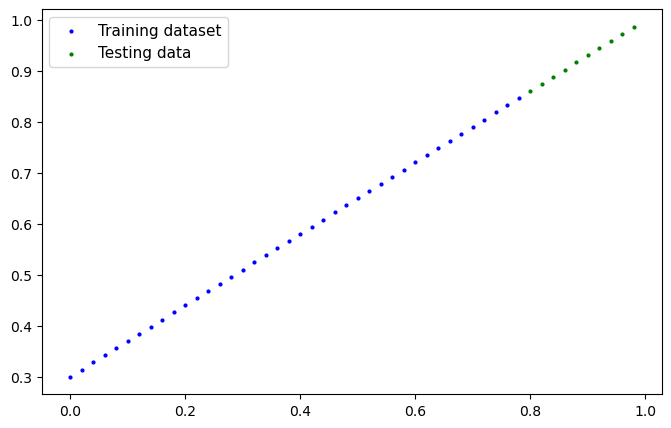

In [37]:
plot_predictions()


## PyTorch Model for Linear Regression  
$\mathbf{y} = \mathbf{\beta_0} + \mathbf{\beta_1} \mathbf{x} + \mathbf{\epsilon}$  

$\mathbf{y}$ es la variable dependiente o respuesta que se trata de predecir.  
$\mathbf{x}$ es la variable independiente o predictor que se utiliza para hacer la predicción.  
$\mathbf{\beta_0}$ es la intersección o el valor de $\mathbf{y}$ cuando $\mathbf{x=0}$.  
$\mathbf{\beta_1}$ es la pendiente o el cambio en $\mathbf{y}$ por unidad de cambio en $\mathbf{x}$.  
$\mathbf{\epsilon}$ es el término de error, que representa la variación en $\mathbf{y}$ que no puede explicarse por la relación lineal entre $\mathbf{x}$ e $\mathbf{y}$.  


In [40]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad = True,
                                               dtype = torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
        
    # method to define the computation in the model   
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias